In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.<br>
A look at the data<br>
Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.<br>
Download 'nba_2013.csv' file from this link:<br>
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

Here are some selected columns from the data:<br>
player - name of the player<br>
pos - the position of the player<br>
g - number of games the player was in<br>
gs - number of games the player started<br>
pts - total points the player scored<br>
There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.<br>
See this site for an explanation of the rest of them.<br>
We can read our dataset in and figure out which columns are present:<br>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [3]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [5]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [6]:
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [7]:
nba['fg.']= nba['fg.'].fillna(nba['fg.'].mean())

In [8]:
l= nba[['x3p.','x2p.','efg.','ft.']]
for i in l:
    nba[i]= nba[i].fillna(nba[i].mean())

In [9]:
nba.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [10]:
nba.pos.value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
G       1
F       1
Name: pos, dtype: int64

In [11]:
nba['pos']= nba['pos'].replace({'SG':0, 'SF':1, 'PF':2, 'C':3,'PG':4, 'F':5,'G':6})

In [12]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,1,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,3,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,2,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,0,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,3,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [13]:
nba.bref_team_id.value_counts()

TOT    63
NOP    18
OKC    17
LAC    16
UTA    16
LAL    16
MIA    15
HOU    15
DAL    15
PHO    15
DET    15
POR    15
ATL    15
NYK    15
BRK    15
MIN    14
WAS    14
SAS    14
CLE    14
BOS    14
CHA    13
ORL    13
MIL    13
MEM    13
DEN    12
GSW    12
IND    12
PHI    12
CHI    11
TOR    10
SAC     9
Name: bref_team_id, dtype: int64

In [14]:
le= LabelEncoder()

In [15]:
nba['bref_team_id']=le.fit_transform(nba['bref_team_id'])

In [16]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,1,23,28,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,3,20,20,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,2,27,28,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,0,28,21,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,3,25,18,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [17]:
c= nba.corr()
c

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
pos,1.000000,0.039657,-0.055041,0.003428,0.072854,0.031925,0.045167,0.031996,0.099133,-0.153906,...,0.153678,0.098315,0.118956,0.229171,0.050137,0.136292,0.156743,0.090855,0.031018,NaN
age,0.039657,1.000000,-0.069022,-0.012074,0.025163,0.007961,-0.009749,-0.018304,0.025202,0.050611,...,-0.068726,0.010822,-0.013451,0.019216,-0.028315,-0.017398,-0.030789,-0.028221,-0.011910,NaN
bref_team_id,-0.055041,-0.069022,1.000000,-0.033973,-0.085699,-0.074628,-0.064508,-0.059403,-0.015635,-0.021181,...,-0.068853,-0.082930,-0.081502,-0.048688,-0.077552,-0.077847,-0.057805,-0.071976,-0.062421,NaN
g,0.003428,-0.012074,-0.033973,1.000000,0.610951,0.864487,0.739993,0.746963,0.319534,0.518074,...,0.546902,0.707389,0.682688,0.551128,0.709650,0.475581,0.713508,0.865797,0.728462,NaN
gs,0.072854,0.025163,-0.085699,0.610951,1.000000,0.860036,0.821619,0.811531,0.234312,0.501808,...,0.560067,0.774892,0.735738,0.636059,0.743178,0.505589,0.767107,0.725573,0.810294,NaN
mp,0.031925,0.007961,-0.074628,0.864487,0.860036,1.000000,0.931120,0.936883,0.272614,0.645056,...,0.576844,0.821145,0.774492,0.733041,0.852331,0.506254,0.885406,0.884484,0.927464,NaN
fg,0.045167,-0.009749,-0.064508,0.739993,0.821619,0.931120,1.000000,0.988262,0.277273,0.597239,...,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769,0.992041,NaN
fga,0.031996,-0.018304,-0.059403,0.746963,0.811531,0.936883,0.988262,1.000000,0.210588,0.662004,...,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560,0.989211,NaN
fg.,0.099133,0.025202,-0.015635,0.319534,0.234312,0.272614,0.277273,0.210588,1.000000,-0.025478,...,0.422642,0.376094,0.403836,0.068001,0.184902,0.400918,0.221244,0.357477,0.247649,NaN
x3p,-0.153906,0.050611,-0.021181,0.518074,0.501808,0.645056,0.597239,0.662004,-0.025478,1.000000,...,-0.065822,0.280171,0.182848,0.617553,0.592092,-0.043707,0.560520,0.446711,0.655342,NaN


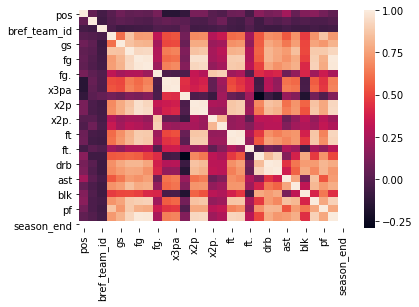

In [18]:
sns.heatmap(c)

In [19]:
c.loc[['fg','fga']]

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
fg,0.045167,-0.009749,-0.064508,0.739993,0.821619,0.931120,1.000000,0.988262,0.277273,0.597239,...,0.562293,0.820259,0.769339,0.708228,0.786597,0.484208,0.903383,0.798769,0.992041,NaN
fga,0.031996,-0.018304,-0.059403,0.746963,0.811531,0.936883,0.988262,1.000000,0.210588,0.662004,...,0.487154,0.771821,0.710910,0.748141,0.803290,0.412738,0.910689,0.786560,0.989211,NaN


In [20]:
y= nba['pts']

In [21]:
x= nba.drop(['player','pts','season','season_end'], axis=1)
#x= nba[['fg','fga']]

In [22]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.2, random_state= 0)

In [23]:
xtest.shape

(97, 27)

In [24]:
xtest.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
15,2,25,18,22,14,795,155,354,0.438,67,...,62,0.952,66,76,142,17,10,7,20,47
124,2,31,26,79,24,1974,302,580,0.521,45,...,92,0.739,74,252,326,222,44,32,121,140
141,2,24,7,80,77,2178,447,820,0.545,0,...,311,0.650,238,446,684,96,70,69,135,193
263,0,21,6,11,0,33,6,17,0.353,3,...,4,1.000,0,2,2,2,1,0,2,2
170,0,25,18,64,64,2057,356,817,0.436,101,...,223,0.785,30,135,165,208,74,12,134,114


In [25]:
knn= KNeighborsRegressor()

In [26]:
knn.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [27]:
pred= knn.predict(xtest)

In [28]:
r2_score(pred,ytest)

0.9724879302258019

In [29]:
(np.sqrt(mean_squared_error(ytest,pred)))

68.84906845269676

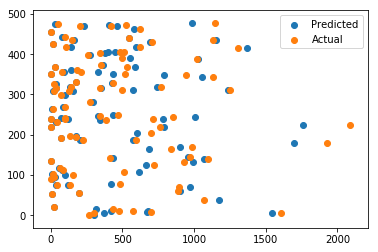

In [44]:
plt.scatter(pred,xtest.index)
plt.scatter(ytest,xtest.index)
plt.legend(['Predicted','Actual'])